In [1]:
import sys
sys.path.append('../') # or just install the module

In [2]:
import numpy as np

N = 200
class_names = ['a', 'b', 'c']
y_target = np.random.randint(0, len(class_names), size=(N))
y_pred_p = np.random.uniform(0, 1, size=(N, len(class_names)))
y_pred_p = y_pred_p/np.sum(y_pred_p, axis=1)[...,None]
#print(np.sum(y_probs, axis=1))
print('y_target', y_target, y_target.shape)
print('y_pred_p', y_pred_p.shape)

y_target [0 0 1 0 1 0 1 2 2 1 2 0 0 0 0 2 0 0 0 2 2 0 0 1 2 2 1 1 1 1 0 2 0 0 0 0 0
 1 0 2 0 0 0 0 2 2 0 0 1 0 0 1 0 2 2 0 1 1 1 1 0 2 2 1 0 1 2 2 1 0 1 1 0 0
 1 2 1 0 0 2 1 2 0 0 2 1 2 0 0 0 2 2 2 0 0 2 2 1 2 1 1 2 1 0 2 0 1 0 2 0 1
 1 0 0 2 1 1 1 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 2 2 0 2 1 2 1 1 0 0 0 0 0 1 0
 2 0 2 1 0 2 2 1 1 1 1 1 1 0 1 1 2 2 0 0 1 2 1 1 0 0 0 2 2 0 2 0 2 1 2 0 0
 1 2 0 1 0 2 2 0 2 2 2 2 0 2 2] (200,)
y_pred_p (200, 3)


(<Figure size 480x400 with 2 Axes>,
 array([[[0.32894737, 0.28947368, 0.38157895],
         [0.44067797, 0.30508475, 0.25423729],
         [0.27692308, 0.43076923, 0.29230769]]]))

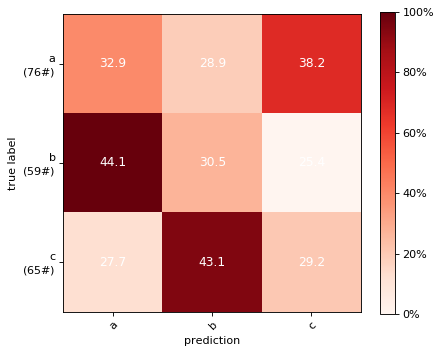

In [3]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
title = ''
#title += f'b-f1score={f1score_xe}'+'\n'
#title += f'b-accuracy={accuracy_xe}%'+'\n'
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':None,
}
#fig, ax = plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':'true',
}
plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)

In [4]:
y_pred_p, y_target

(array([[6.27794433e-01, 2.85553867e-01, 8.66516994e-02],
        [1.93192041e-01, 3.98561263e-01, 4.08246696e-01],
        [3.51339709e-01, 3.09745143e-01, 3.38915149e-01],
        [8.18626746e-01, 1.12507520e-01, 6.88657338e-02],
        [4.45985908e-01, 5.34591504e-01, 1.94225876e-02],
        [5.38956010e-01, 4.62124374e-03, 4.56422746e-01],
        [3.97980061e-01, 3.55890909e-01, 2.46129030e-01],
        [6.39148567e-01, 4.95460389e-02, 3.11305394e-01],
        [1.18984914e-01, 2.86272606e-01, 5.94742481e-01],
        [2.34442421e-01, 6.29306236e-01, 1.36251343e-01],
        [1.15664841e-03, 5.08854900e-01, 4.89988451e-01],
        [3.15278130e-02, 2.18568625e-01, 7.49903562e-01],
        [9.15631439e-01, 3.80360238e-02, 4.63325371e-02],
        [4.45308066e-01, 4.50498244e-02, 5.09642110e-01],
        [2.27012230e-01, 4.23593379e-01, 3.49394391e-01],
        [4.88973386e-01, 4.18469961e-01, 9.25566538e-02],
        [1.26295449e-01, 1.56960197e-01, 7.16744355e-01],
        [2.974

In [5]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
print(metrics_cdict[class_names[0]].keys())
print(metrics_dict.keys())
{c:metrics_cdict[c]['recall'] for c in class_names}
for k in metrics_dict.keys():
    if 'w-' in k:
        continue
    print(k, metrics_dict[k])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['precision', 'recall', 'f1score', 'accuracy', 'prc', 'prauc', 'rocc', 'rocauc', 'xentropy'])
dict_keys(['b-precision', 'w-precision', 'b-recall', 'w-recall', 'b-f1score', 'w-f1score', 'b-accuracy', 'w-accuracy', 'b-prauc', 'w-prauc', 'b-rocauc', 'w-rocauc', 'b-xentropy', 'w-xentropy'])
b-precision 0.30953729507055366
b-recall 0.30877988884307883
b-f1score 0.30838401759133083
b-accuracy 0.5399999730000012
b-prauc 0.3589094896240836
b-rocauc 0.5115275139753226
b-xentropy 1.3328581118176734


In [6]:
from sklearn import metrics as skmetrics

precision, recall, f1score,_ = skmetrics.precision_recall_fscore_support(y_target, y_pred_p.argmax(axis=-1),
                average=None,
                labels=range(0, len(class_names)),
                )
print(np.mean(precision))
print(np.mean(recall))
print(np.mean(f1score))

0.30953734150665096
0.3087799354971523
0.3083890510453435


In [7]:
precision, recall, score,_ = skmetrics.precision_recall_fscore_support(
    np.array([0, 0, 0 ,1 ,0 ,1, 0, 0 ,0, 1, 0, 0, 1, 0, 0, 1 ,0, 0 ,0 ,1]).astype(bool),
    np.array([0 ,0, 1, 0 ,0, 1 ,1 ,0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ,0, 0 ,0]).astype(bool),
    average='binary', pos_label=1)
print(precision)

0.25


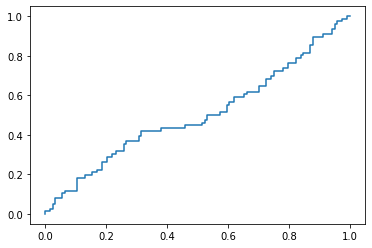

In [8]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['rocc']
plt.plot(rocc['fpr'], rocc['tpr'])

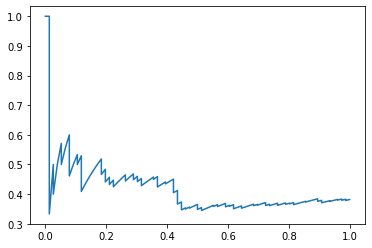

In [9]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['prc']
plt.plot(rocc['recall'], rocc['precision'])